<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Авторы материала: преподаватели ФКН НИУ ВШЭ Кашницкий Юрий и Шестаков Андрей
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинар 3. Линейная алгебра и Python

## Часть 4. Оптимизация функций. Символьные вычисления

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy.optimize as opt
import sympy

plt.style.use('ggplot')

%matplotlib inline

# Методы оптимизации функции в Python

## Выпуклые функции

Рассмотрим две функции:

In [2]:
x = np.linspace(-5, 5, 100)

y1 = lambda(x): 0.5*x**2 + 10*np.sin(x) - 2
y2 = lambda(x): x**2 + 0.5**x - 4

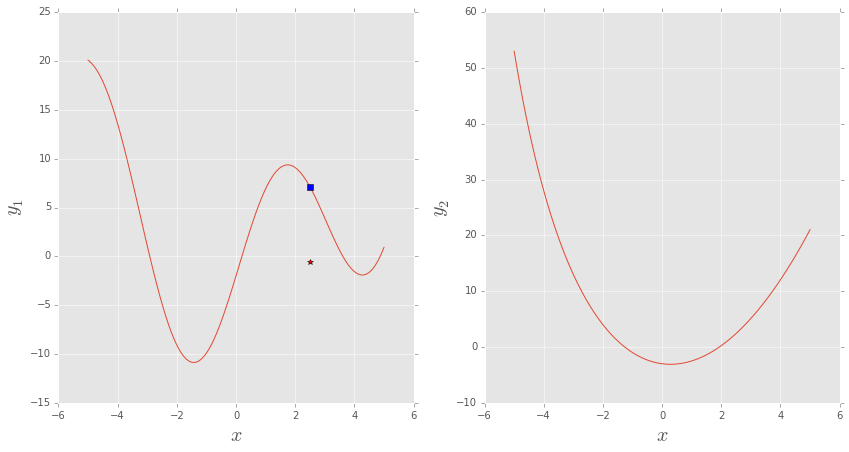

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].plot(x, y1(x))
ax[0].set_ylabel('$y_1$', fontsize=20)
ax[0].set_xlabel('$x$', fontsize=20)

ax[1].plot(x, y2(x))
ax[1].set_ylabel('$y_2$', fontsize=20)
ax[1].set_xlabel('$x$', fontsize=20)

t = [0,5]
alpha = 0.5
f1 = alpha*y1(t[0]) + (1-alpha)*y1(t[1])
f2 = y1(alpha*t[0] + (1-alpha)*t[1])

ax[0].plot(alpha*t[0] + (1-alpha)*t[1], f1, '*r')
ax[0].plot(alpha*t[0] + (1-alpha)*t[1], f2, 'sb')

Функция $f(x)$ называется выпуклой (convex), если для любых двух точек $u$ и $v$ и для любого числа $\alpha \in [0,1]$ выполняется: 
$$ f\left(\alpha u + [1-\alpha] v\right) \leq \alpha f(u) + (1-\alpha) f(v) $$

Выпуклые фукнции играют важную роль в задачах оптимизации, поскольку для них относительно легко ищется глобальный, а не локальный оптимум. 

Посмотрим на выпуклую функцию в 3D.

In [4]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x,y)
Z = X**2 + 0.25*Y**2

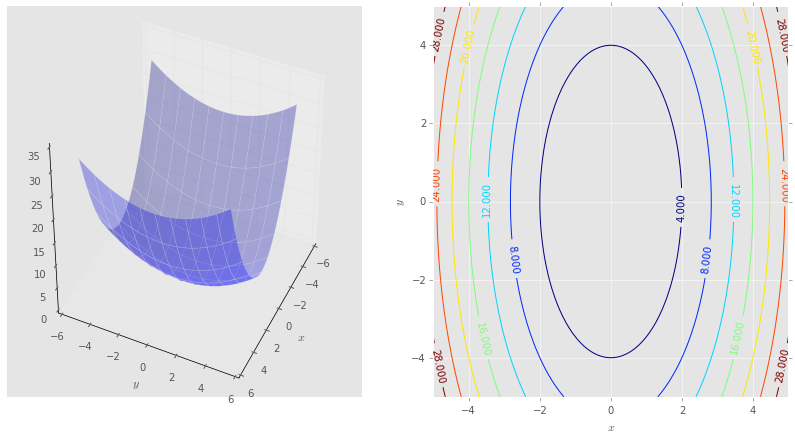

In [5]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(X, Y, Z, alpha=0.3,)
# ax.plot_(X, Y, Z)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(X, Y, Z)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

## Гладкие функции

Гладкие функции (непрерывно дифференцируемые, smooth functions) удобны тем, что в любой точке можно посчитать её производую (градиент)

In [6]:
x = np.linspace(-5, 5, 100)

y1 = lambda(x): 10*x**(2)
y2 = lambda(x): abs(x)

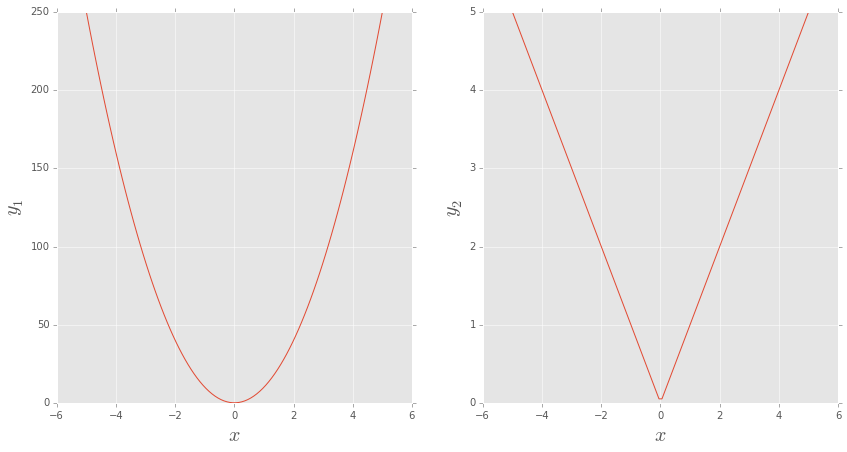

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].plot(x, y1(x))
ax[0].set_ylabel('$y_1$', fontsize=20)
ax[0].set_xlabel('$x$', fontsize=20)

ax[1].plot(x, y2(x))
ax[1].set_ylabel('$y_2$', fontsize=20)
ax[1].set_xlabel('$x$', fontsize=20)

## Поиск экстемумов в Python

В зависимости от того, какую функцию надо минимизировать (или максимизировать), нужно выбирать разные методы. Как правило, мы будем работать с выпуклыми и гладкими функциями.

In [9]:
# Задаём функцию
def f(x):
    return x**2 + np.exp(x) - 4

# Находим минимум
x_min = opt.minimize(f, -3)
x_min

   status: 0
  success: True
     njev: 7
     nfev: 21
 hess_inv: array([[ 0.36994154]])
      fun: -3.172815973872476
        x: array([-0.35173371])
  message: 'Optimization terminated successfully.'
      jac: array([  5.96046448e-08])
      nit: 5

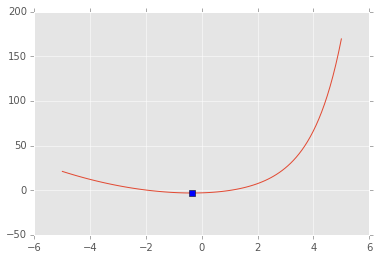

In [10]:
x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.plot(x_min['x'], x_min['fun'], 'sb') 

# Символьные вычисления

Символьные вычисления в Python выполняются в модуле `sympy`

### Числа

In [11]:
sympy.init_printing(use_latex=True)

a = sympy.Rational(1, 2)
print(a)
print(a + 2)

1/2
5/2


In [12]:
print(sympy.pi)
print(sympy.pi.evalf(n=4))

pi
3.142


### Выражения

In [13]:
x = sympy.Symbol('x')
y, z = sympy.symbols('y z')
w = (x + y)**2

In [14]:
w

In [15]:
sympy.expand(w)

In [16]:
sympy.factor(x**2 - y**2)

In [17]:
sympy.simplify(w - 2*x*y)

In [18]:
sympy.simplify(sympy.sin(x)/sympy.cos(x))

### Дифференцирование

In [19]:
sympy.diff(w, x)

In [20]:
sympy.diff(w, x, 2)

### Решение уравнений

In [21]:
sympy.solve(x**2 - 4, x)

In [22]:
res = sympy.solve([x + 2*y - 2, 
                   x + 3*y - 6], x, y)

In [23]:
res

In [24]:
type(res)

dict

При оптимизации функций для некоторых методов необходимо расчитать градиент функций.
Используйте `sympy` если испытывайте какие-то сложности, затем, дополнительно проверяйте с `scipy.optimize.check_grad()`

In [25]:
sympy.init_printing(use_latex=False)

# Решение задачи линейной регрессии

Рассмотрим 3 наблюдения:

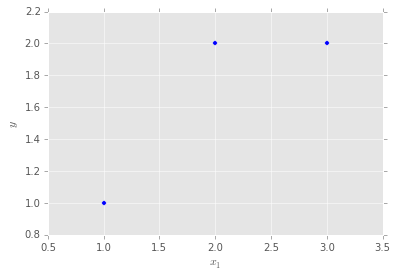

In [26]:
X = np.array([[1, 1],
              [1, 2],
              [1, 3]])
y = np.array([1, 2, 2])

plt.scatter(X[:,1], y)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

Можем ли мы провести через них прямую?
Почему?

Как бы вы решали эту задачу, если бы нужно было провести прямую через 2 точки?

## Normal Equation

Если система $$ A x = b $$ не имеет решения, то решайте $$A^\top A x = A^\top b$$

In [27]:
Beta = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
print(Beta)

[ 0.66666667  0.5       ]


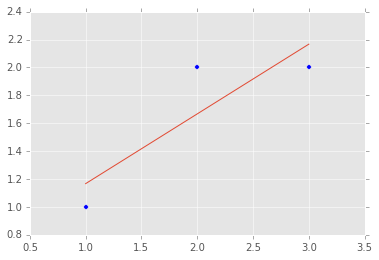

In [28]:
y_hat = X.dot(Beta)

plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_hat)

##  Дифференцирование

$X$ - признаковое описание наблюдений,<br\> $y$ - прогнозируемая величина

Пусть задана функция ошибки (функция потерь) $L(\cdot)$. <br\>
Нам надо построить такой функционал $f(X)$, который будет выдавать значения, наиболее близкие к $y$, иначе говоря: $$L\left(f(X) - y\right) \rightarrow\min $$

Определим функцию потерь, как сумму квадратов разности выдаваемого ответа функционала и реального значения: 
$$ L(\cdot) = \frac{1}{2n}\sum_{i=1}^n(f(x^{(i)}) - y^{(i)})^2$$

Так как среди всего множества моделей мы выбрали линейную регрессию, то $$f(X) = \beta_0 + \beta_1x_1$$
Подставляем это выражение в $L(\cdot)$ и находим $\beta_0$,
$\beta_1$.

## Градиентный спуск (gradient descent)

Градиентый спуск - это итеративный метод оптимизации функции. Он заключается в постепенном перемещении к точке экстремума в направлении антиградиента этой функции в точке.

Пусть дана функция $L(\theta)$, необходимо найти $\hat{\theta}:\ L(\hat{\theta}) = \min L(\theta)$ <br\>

Шаги алгоритма:

    1. Случайным образом фиксируется начальное состояние 
    2. Пока алгоритм не сойдется, выполняется обновление:
$$ \theta = \theta - \alpha \frac{\partial L}{\partial \theta} $$
    где $\alpha$ - скорость спуска

**Пример:**
$$L(\theta) = 3\theta^2 + 2\theta - 10$$
Найдем градиент (в данном случае простую производую, так как у нас одна переменная)
$$ \frac{\partial L}{\partial \theta}  = 6\theta + 2$$

In [33]:
def f(x):
    return 3*x**2 + 2*x - 10

def grad(x):
    return 6*x + 2

iter_max = 500 # максимальное кол-во итераций
alpha = 0.01 # скорость спуска
old_min = 0
temp_min = 4
precision = 0.001 # требуемая точность
i = 0

mins = [temp_min] # значения на каждой итерации алгоритма
cost = [] # разность с инстинным решением

# Напишите код, реализующий данный алгоритм
# 
while abs(temp_min - old_min) > precision and i < iter_max:
    ## ...
    temp_min -= alpha * grad(temp_min)
    mins.append(temp_min)
    cost.append(temp_min - old_min)
    i += 1

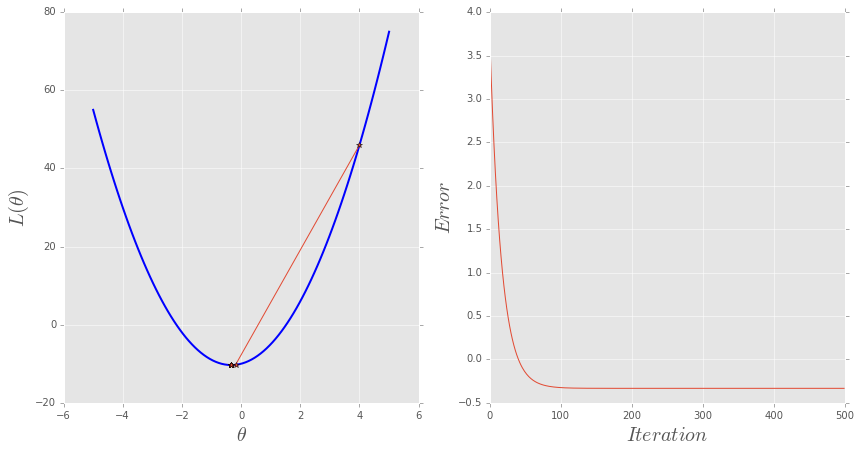

In [34]:
x = np.linspace(-5, 5, 100)

# Рисуем функцию
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].plot(x, f(x), 'b', linewidth=2)
ax[0].set_ylabel('$ L(\\theta) $', fontsize=20)
ax[0].set_xlabel('$\\theta$', fontsize=20)

# Рисуем пусть градиента
mins = np.array(mins)
idx = np.linspace(0, len(mins)-1, 10).astype(int)

ax[0].plot(mins[idx], f(mins[idx]), '-*')


# Смотрим как уменьшается ошибка с итерацией
ax[1].plot(cost)
ax[1].set_ylabel('$Error$', fontsize=20)
ax[1].set_xlabel('$Iteration$', fontsize=20)

Вернемся к линейной регрессии..

Теперь, когда мы знаем градиент функции квадратичной ошибки для линейной регрессии $\beta_0$, $\beta_1$, можно использовать метод градиентного спуска.

**Важно!** Веса должны обновляться одновременно, а не по очереди!

In [ ]:
# Напишите код, реализующий данный алгоритм для линейной регрессии
# 
def gradient_descent(X, y, iters, alpha):
    costs = []
    n = y.shape[0] 
    Beta = np.random.rand(2)
    history = [Beta] 
    preds = []
    for i in xrange(iters):
        #....
        
    return history, costs, preds, Beta